In [1]:
from itertools import count

import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('D:/美赛资料/8bd6b-main/Problem_C_Data/Problem_C_Data/新建 Microsoft Excel 工作表.xlsx',sheet_name='Sheet2')

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,review_body,review_date,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,US,40626522,R1A3ZUBR8TSAKY,B00793CZAE,572944212,"mary meyer wubbanub plush pacifier, lamb",Baby,5,0.0,0,...,Perfect match for the Gund Huggybuddy I bought...,8/31/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,US,16290022,RLJNYBK4FGBYX,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0.0,0,...,My little girl love this paci contraption!,8/31/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,US,10216509,R26QCW75C4JDOK,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0.0,0,...,My son loves this one and will only sleep if h...,8/31/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,US,114040,R2E7N0TVLUHUDR,B003CK3LDI,392768822,wubbanub infant pacifier - giraffe,Baby,5,0.0,0,...,Perfect,8/31/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,US,27971579,R1SO9VMCIGZX3U,B003PCYMP4,911821018,wubbanub lamb infant pacifier,Baby,5,0.0,0,...,Amazing addition to the nursery!,8/31/2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import re
import numpy as np
import pandas as pd

def cleartest(df, keywords):
    df2 = df['product_title']
    # 使用非捕获组消除警告
    pattern = r'\b(?:' + '|'.join([re.escape(kw) for kw in keywords]) + r')\b'
    aa = df2.str.contains(pattern, case=False, regex=True, na=False)

    # 获取匹配的行索引
    matching_indices = np.where(aa)[0]

    # 返回匹配的行和个数
    return df[aa], len(matching_indices)
keywords = [
    'pacifiers', 'baby', 'dummy',

    # 包含"奶嘴"的喂养用品
    "pacifier", "nipple", "baby bottle", "formula", "milk powder", "baby food",
    "bib", "sippy cup", "breast pump", "feeding bottle", "teething biscuits", "baby cereal",
    "bottle brush", "bottle sterilizer", "bottle warmer", "formula dispenser",
    "milk storage bags", "nursing cover", "nursing pillow", "burp cloths",
    "feeder", "weaning spoons", "baby bowls", "snack cup", "food grinder",
    "insulated bottle bag", "suckle", "anti-colic bottle", "transition cup",

    # 护理用品
    "diaper", "baby wipes", "baby powder", "baby lotion", "diaper cream", "thermometer",
    "nasal aspirator", "nail clippers", "baby brush", "grooming kit", "humidifier",
    "baby oil", "baby shampoo", "baby wash", "ear thermometer", "forehead thermometer",
    "diaper pail", "changing pad", "changing table", "potty", "training pants",
    "teething gel", "medicine dispenser", "baby first aid kit", "baby sunscreen",
    "insect repellent", "baby cotton buds", "baby soap", "baby detergent",

    # 衣物与纺织品
    "onesie", "swaddle", "baby blanket",
    "swaddle blanket", "muslin blanket", "receiving blanket",
    "quilt", "cot quilt", "baby quilt", "throw blanket",
    "security blanket", "comfort blanket",
    "thermal blanket", "waffle blanket",
    "baby sleep sack", "wearable blanket",
    "romper", "bodysuit", "pajamas", "sleepwear", "sleepsuit",
    "baby socks", "booties", "mittens", "hat", "beanie", "sun hat",
    "bib", "burp cloth", "hooded towel", "washcloth", "bath towel",
    "baby gown", "cardigan", "jacket", "snowsuit", "rain cover",
    "t-shirt", "pants", "leggings", "overalls", "dungarees",
    "swim diaper", "swimsuit", "rash guard", "swim vest",

    # 寝具与家具
    "crib", "bassinet", "playpen", "high chair", "baby monitor",
    "changing table", "dresser", "rocking chair", "glider", "nursery chair",
    "co-sleeper", "bedside sleeper", "toddler bed", "bed rail", "bed guard",
    "mattress", "mattress protector", "sheet", "fitted sheet", "crib bumper",
    "baby nest", "sleep pod", "baby hammock", "swing", "bouncer", "rocker",
    "play gym", "activity center", "walker", "jumper", "exercise saucer",
    "bookshelf", "toy storage", "laundry hamper", "nursery rug", "blackout curtains",

    # 出行用品
    "stroller", "car seat", "baby carrier",
    "pram", "travel system", "double stroller", "umbrella stroller",
    "jogging stroller", "stroller organizer", "stroller rain cover", "stroller fan",
    "stroller muff", "car seat canopy", "car seat protector", "car seat mirror",
    "baby wrap", "sling", "soft structured carrier", "hiking carrier", "backpack carrier",
    "diaper bag", "backpack diaper bag", "travel crib", "portable crib", "travel high chair",
    "car seat travel bag", "stroller travel bag", "luggage", "suitcase",

    # 洗浴用品
    "baby bathtub", "baby shampoo", "body wash", "towel", "bath toy", "rubber duck",
    "bath thermometer", "bath seat", "bath support", "bath sponge", "bath kneeler",
    "faucet cover", "bath rack", "soap dispenser", "shampoo rinse cup", "bath book",
    "bath crayons", "water toys", "splash mat", "bath robe", "hooded bath towel",
    "baby shower", "bath organizer", "non-slip mat", "toy net", "toy scoop",

    # 玩具与安抚
    "rattle", "teething toy", "teether", "stuffed animal", "mobile", "play mat",
    "soft book", "cloth book", "board book", "bath book", "activity mat", "gym mat",
    "play yard", "play tunnel", "tent", "ball pit", "balls", "stacking rings",
    "shape sorter", "nesting cups", "blocks", "building blocks", "pull toy",
    "push toy", "ride-on toy", "balance bike", "tricycle", "scooter",
    "musical toy", "xylophone", "drum", "piano", "music player", "white noise machine",
    "night light", "projector", "soother", "comfort item", "lovey", "cuddle toy",
    "plush toy", "doll", "action figure", "puzzle", "magnetic tiles", "train set",
    "play kitchen", "tool set", "doctor kit", "tea set", "play food",

    # 安全与健康
    "baby gate", "safety gate", "corner guard", "edge guard", "outlet cover",
    "cabinet lock", "door lock", "stove guard", "fireplace guard", "window guard",
    "monitor", "video monitor", "movement monitor", "breathing monitor", "wearable monitor",
    "air purifier", "dehumidifier", "cool mist humidifier", "warm mist humidifier",
    "baby scale", "growth chart", "health kit", "medicine syringe", "nasal spray",
    "vapor rub", "chest rub", "teething tablets", "gripe water", "probiotics",

    # 哺乳用品
    "nursing bra", "nursing tank", "nursing pads", "breast pads", "nipple shield",
    "nipple cream", "lanolin cream", "breast milk cooler", "cooler bag", "ice packs",
    "hands-free pumping bra", "pumping parts", "milk catcher", "haakaa", "let-down catcher",
    "nursing stool", "nursing necklace", "teething necklace", "amber necklace",

    # 特殊需求
    "weighted blanket", "sensory toy", "fidget toy", "chewelry", "chew necklace",
    "textured ball", "visual stimulation cards", "black and white toys", "high contrast toys",
    "adaptive spoon", "special needs bottle", "special needs chair", "therapy ball"
]
aa,bb = cleartest(df,keywords)
print(type(aa),bb)

<class 'pandas.core.frame.DataFrame'> 15658


## 进行LDA实现


In [8]:
# type(aa['review_body'])


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# 1. 准备数据
documents = [
    "machine learning is core of artificial intelligence",
    "deep learning is a branch of machine learning",
    "natural language processing is important in AI",
    "computer vision processes images and videos"
]

# 2. 创建词袋模型
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)

# 3. 训练LDA
n_topics = 2
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=10
)
lda.fit(X)

# 4. 查看结果
feature_names = vectorizer.get_feature_names_out()

# 查看每个主题的词分布
for topic_idx, topic in enumerate(lda.components_):
    print(f"主题 #{topic_idx}:")
    # 获取权重最高的前10个词
    top_words = [feature_names[i] for i in topic.argsort()[:-5-1:-1]]
    print(" ".join(top_words))
    print()

# 查看每个文档的主题分布
doc_topic_dist = lda.transform(X)
print("文档主题分布:")
for i, dist in enumerate(doc_topic_dist):
    print(f"文档{i}: {dist}")

主题 #0:
learning machine branch deep core

主题 #1:
language natural processing important ai

文档主题分布:
文档0: [0.91395918 0.08604082]
文档1: [0.91445365 0.08554635]
文档2: [0.08693423 0.91306577]
文档3: [0.08693423 0.91306577]


In [17]:
cc = aa.dropna(axis=0,how='any',subset=['review_body'])
cc2 = cc['review_body']
len(cc2)

15654

In [20]:
# type(aa['review_body'])


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd

# 1. 准备数据
cc2 = cc['review_body']

# 2. 创建词袋模型
vectorizer = CountVectorizer(
    token_pattern=r'(?u)\b\w+\b',  # 匹配所有字母数字字符
    max_features=1000,  # 限制特征数量
    stop_words=['nice','perfect']  # 中文停用词
)
X = vectorizer.fit_transform(cc2)

# 3. 训练LDA
n_topics = 2
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=10
)
lda.fit(X)

# 4. 查看结果
feature_names = vectorizer.get_feature_names_out()

# 查看每个主题的词分布
for topic_idx, topic in enumerate(lda.components_):
    print(f"主题 #{topic_idx}:")
    # 获取权重最高的前10个词
    top_words = [feature_names[i] for i in topic.argsort()[:-5-1:-1]]
    print(" ".join(top_words))
    print()

# 查看每个文档的主题分布
doc_topic_dist = lda.transform(X)
print("文档主题分布:")
for i, dist in enumerate(doc_topic_dist):
    print(f"文档{i}: {dist}")

AttributeError: 'int' object has no attribute 'lower'

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np


import pandas as pd
import re
# 1. 准备数据 - 确保所有数据是字符串类型
cc2 = cc['review_body'].astype(str)  # 转换为字符串类型
# 或者如果有缺失值，可以先填充
# cc2 = cc['review_body'].fillna('').astype(str)

##
english_stopwords = [
    "this", "br", "t", "s", "baby", "great", "product", "one", "good", "use",

    # 通用评价词汇（在评论中高频但主题区分度低）
    "love", "like", "perfect", "excellent", "amazing", "awesome", "nice", "best",
    "perfectly", "exactly", "better", "best", "better", "worst", "ok", "okay",
    "fine", "decent", "average", "poor", "bad", "terrible", "horrible", "awful",
    "happy", "satisfied", "pleased", "disappointed", "unhappy", "unsatisfied",
    "recommend", "recommended", "highly", "definitely", "absolutely", "totally",

    # 宝宝类产品通用词汇
    "product", "item", "purchase", "buy", "bought", "ordered", "order", "received",
    "arrived", "shipping", "delivery", "price", "cost", "money", "paid", "value",
    "quality", "material", "size", "color", "colour", "fit", "fits", "small", "large",
    "big", "little", "tiny", "soft", "hard", "heavy", "light", "easy", "difficult",
    "simple", "complicated", "works", "working", "work", "broken", "broke", "break",
    "durable", "sturdy", "cheap", "expensive", "affordable", "worth", "quality",

    # 宝宝相关高频通用词
    "son", "daughter", "child", "children", "kid", "kids", "toddler", "infant",
    "newborn", "boy", "girl", "months", "month", "years", "year", "old", "age",
    "birth", "birthday", "gift", "present", "christmas", "holiday", "birthday",
    "grandson", "granddaughter", "nephew", "niece", "parent", "parents", "mother",
    "mom", "father", "dad", "grandma", "grandpa", "aunt", "uncle", "family",

    # 功能动词
    "use", "using", "used", "uses", "try", "tried", "trying", "tries", "make",
    "makes", "making", "made", "take", "takes", "taking", "took", "taken", "get",
    "gets", "getting", "got", "gotten", "put", "puts", "putting", "come", "comes",
    "coming", "came", "go", "goes", "going", "went", "gone", "know", "knows",
    "knowing", "knew", "known", "see", "sees", "seeing", "saw", "seen", "want",
    "wants", "wanting", "wanted", "need", "needs", "needing", "needed", "find",
    "finds", "finding", "found", "give", "gives", "giving", "gave", "given",
    "think", "thinks", "thinking", "thought", "look", "looks", "looking", "looked",

    # 程度副词和修饰语
    "very", "really", "quite", "pretty", "rather", "somewhat", "extremely",
    "incredibly", "completely", "totally", "absolutely", "especially", "particularly",
    "mostly", "mainly", "generally", "usually", "often", "sometimes", "rarely",
    "always", "never", "almost", "nearly", "barely", "hardly", "just", "only",
    "even", "still", "already", "yet", "again", "back", "also", "too", "as", "well",

    # 人称代词和指示词
    "i", "me", "my", "myself", "we", "us", "our", "ours", "ourselves", "you", "your",
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her",
    "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs",
    "themselves", "this", "that", "these", "those", "here", "there", "where",

    # 连接词和介词
    "and", "but", "or", "nor", "for", "so", "yet", "although", "because", "since",
    "unless", "while", "whereas", "if", "then", "once", "as", "than", "though",
    "about", "above", "across", "after", "against", "along", "among", "around", "at",
    "before", "behind", "below", "beneath", "beside", "between", "beyond", "by",
    "down", "during", "except", "from", "in", "inside", "into", "near", "of", "off",
    "on", "onto", "out", "outside", "over", "through", "to", "toward", "under",
    "until", "up", "upon", "with", "within", "without",

    # 冠词和助动词
    "a", "an", "the", "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing", "can", "could",
    "will", "would", "shall", "should", "may", "might", "must",

    # 数量词
    "all", "any", "both", "each", "every", "few", "many", "more", "most", "much",
    "several", "some", "such", "no", "none", "nothing", "everything", "something",
    "anything", "another", "other", "others", "same", "different", "own", "same",

    # 时间词
    "when", "while", "before", "after", "since", "until", "once", "now", "then",
    "today", "yesterday", "tomorrow", "soon", "later", "early", "late", "always",
    "never", "often", "sometimes", "usually", "frequently", "rarely", "recently",

    # 特殊宝宝产品相关高频通用词
    "brand", "name", "company", "manufacturer", "seller", "vendor", "store", "shop",
    "online", "website", "amazon", "walmart", "target", "website", "site", "store",
    "stars", "star", "rating", "ratings", "review", "reviews", "reviewed", "reviewer",
    "picture", "pictures", "photo", "photos", "image", "images", "video", "videos",
    "description", "descriptions", "described", "advertised", "advertisement", "ad",

    # 宝宝产品功能通用词
    "easy", "easily", "easier", "difficult", "hard", "harder", "simple", "simply",
    "quick", "quickly", "fast", "slow", "slowly", "safe", "safely", "safety", "clean",
    "cleaning", "cleaner", "wash", "washing", "washed", "washable", "dry", "drying",
    "machine", "hand", "hands", "help", "helps", "helpful", "helping", "helped",

    # 宝宝用品类别通用词
    "toy", "toys", "clothes", "clothing", "shirt", "pants", "dress", "diaper", "diapers",
    "bottle", "bottles", "feeding", "food", "sleep", "bed", "crib", "stroller", "car",
    "seat", "seats", "play", "playing", "game", "games", "book", "books", "educational",
    "learn", "learning", "teach", "teaching", "education", "educational", "fun", "funny",
    "entertaining", "entertainment", "music", "musical", "sound", "sounds", "noise",
    "noisy", "quiet", "loud", "bright", "colorful", "colors", "colourful", "colours",
     'loved','what','not','time'


]

# 注意：这个列表可以进一步扩展。在实际使用中，您可能还需要根据具体领域添加或删除一些词。

# 2. 创建词袋模型
vectorizer = CountVectorizer(
    token_pattern=r'(?u)\b\w+\b',  # 匹配所有字母数字字符
    max_features=1000,  # 限制特征数量
    stop_words=english_stopwords,  # 英文停用词
    lowercase=True,  # 转换为小写（默认就是True）
    max_df=0.9,  # 忽略在90%以上文档中出现的词
    min_df=2  # 忽略在少于2个文档中出现的词
)
X = vectorizer.fit_transform(cc2)

# 3. 训练LDA
n_topics = 5
lda = LatentDirichletAllocation(
    n_components=n_topics,
    random_state=42,
    max_iter=20,  # 增加迭代次数
    learning_method='batch',  # 使用batch方法
    n_jobs=-1  # 使用所有CPU核心
)
lda.fit(X)

# 4. 查看结果
feature_names = vectorizer.get_feature_names_out()

# 查看每个主题的词分布
for topic_idx, topic in enumerate(lda.components_):
    print(f"主题 #{topic_idx}:")
    # 获取权重最高的前10个词
    top_words_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]

    for word, weight in zip(top_words, top_weights):
        print(f"  {word}: {weight:.4f}")
    print()

# 查看每个文档的主题分布
doc_topic_dist = lda.transform(X)
print("\n文档主题分布 (前10个文档):")
for i, dist in enumerate(doc_topic_dist[:10]):
    main_topic = np.argmax(dist)
    print(f"文档{i} (主主题: {main_topic}): {dist}")

# 统计每个主题的文档数量
dominant_topics = np.argmax(doc_topic_dist, axis=1)
topic_counts = np.bincount(dominant_topics, minlength=n_topics)
print(f"\n每个主题的文档数量: {topic_counts}")

主题 #0:
  cute: 933.2766
  m: 353.6480
  super: 353.4695
  how: 276.3354
  mattress: 255.8323
  don: 249.9516
  comfortable: 238.8997
  enough: 236.3356
  new: 235.7031
  sure: 213.7161

主题 #1:
  pacifier: 2726.1537
  loves: 2072.3050
  mouth: 1234.9236
  hold: 769.2341
  cute: 756.8680
  wubbanub: 744.1956
  paci: 663.0175
  keep: 625.2399
  animal: 600.1969
  night: 594.1039

主题 #2:
  pacifiers: 1883.9140
  pacifier: 1814.4919
  nipple: 831.1946
  mouth: 716.9251
  babies: 435.0495
  hospital: 432.9897
  shape: 404.1542
  don: 391.6561
  doesn: 389.3489
  likes: 361.5050

主题 #3:
  bag: 895.4146
  2: 578.8835
  monitor: 501.1987
  first: 397.3394
  two: 385.9218
  which: 362.5864
  5: 332.8047
  3: 328.0026
  room: 315.0929
  don: 308.1026

主题 #4:
  34: 1136.5298
  ones: 764.7535
  pacifiers: 641.6799
  pink: 386.1947
  3: 275.9623
  pacifier: 274.9502
  two: 260.7860
  blue: 245.1933
  loves: 234.1726
  wish: 219.9249


文档主题分布 (前10个文档):
文档0 (主主题: 4): [0.10062471 0.10000031 0.10029546 

开始可视化LDA主题建模结果...
主题数量: 5
文档数量: 15654
词汇表大小: 1000
LDA主题建模可视化结果

1. 每个主题的关键词分布


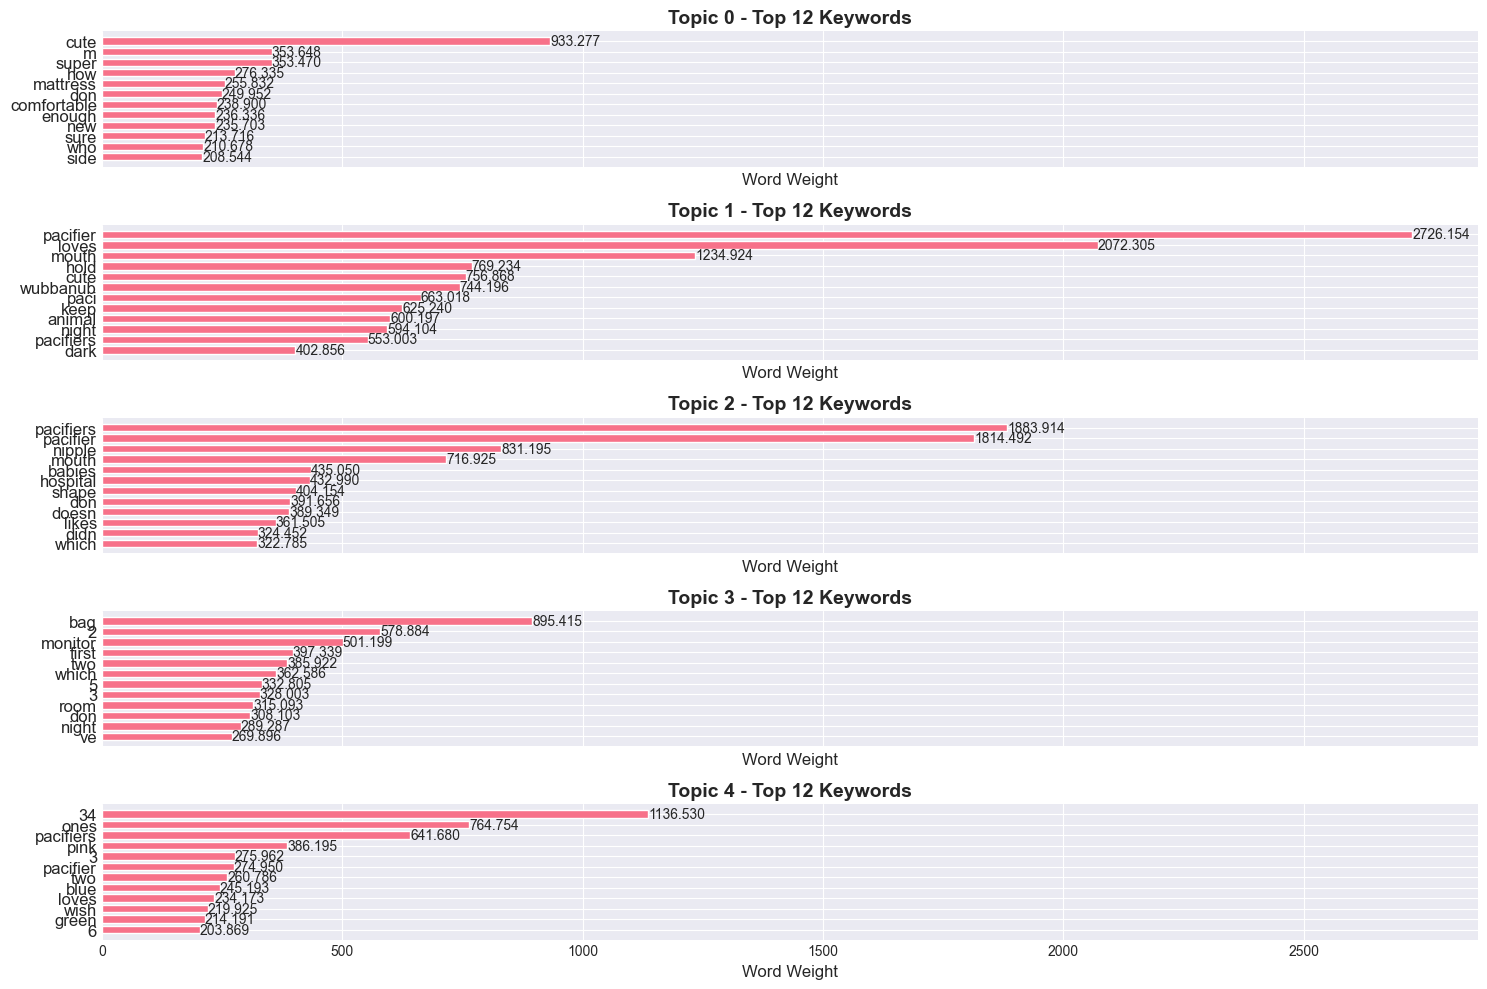


2. 主题词云


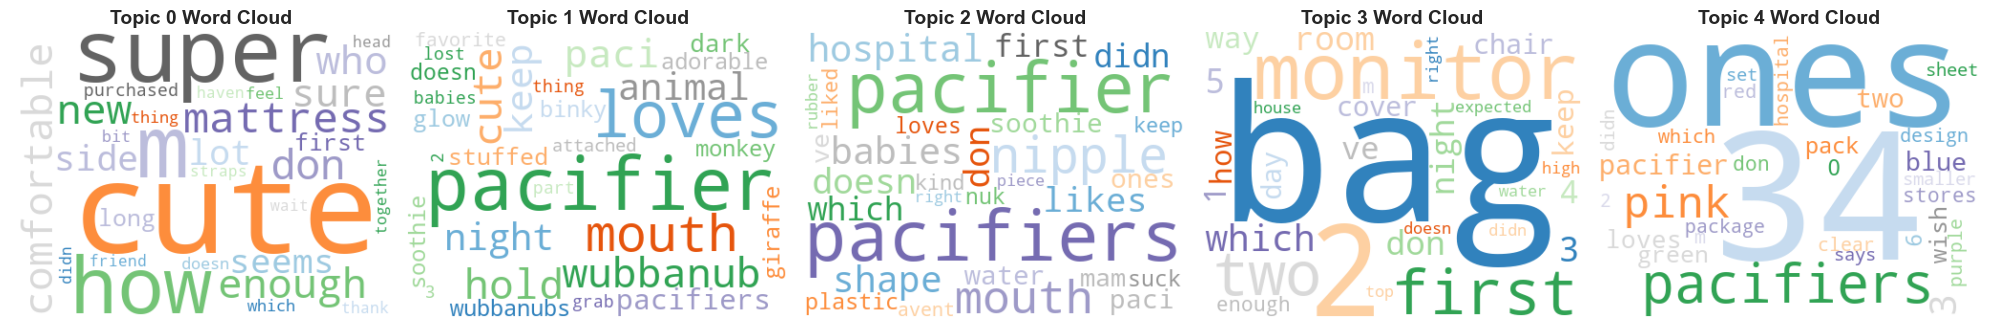


3. 文档主题分布饼图


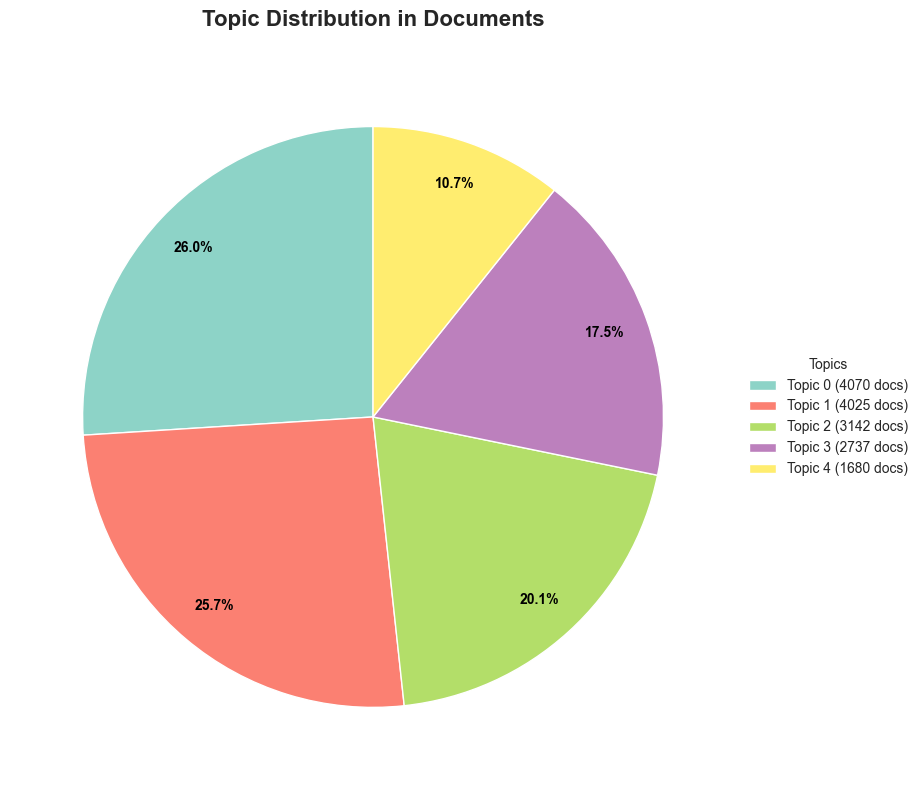


4. 文档主题分布直方图


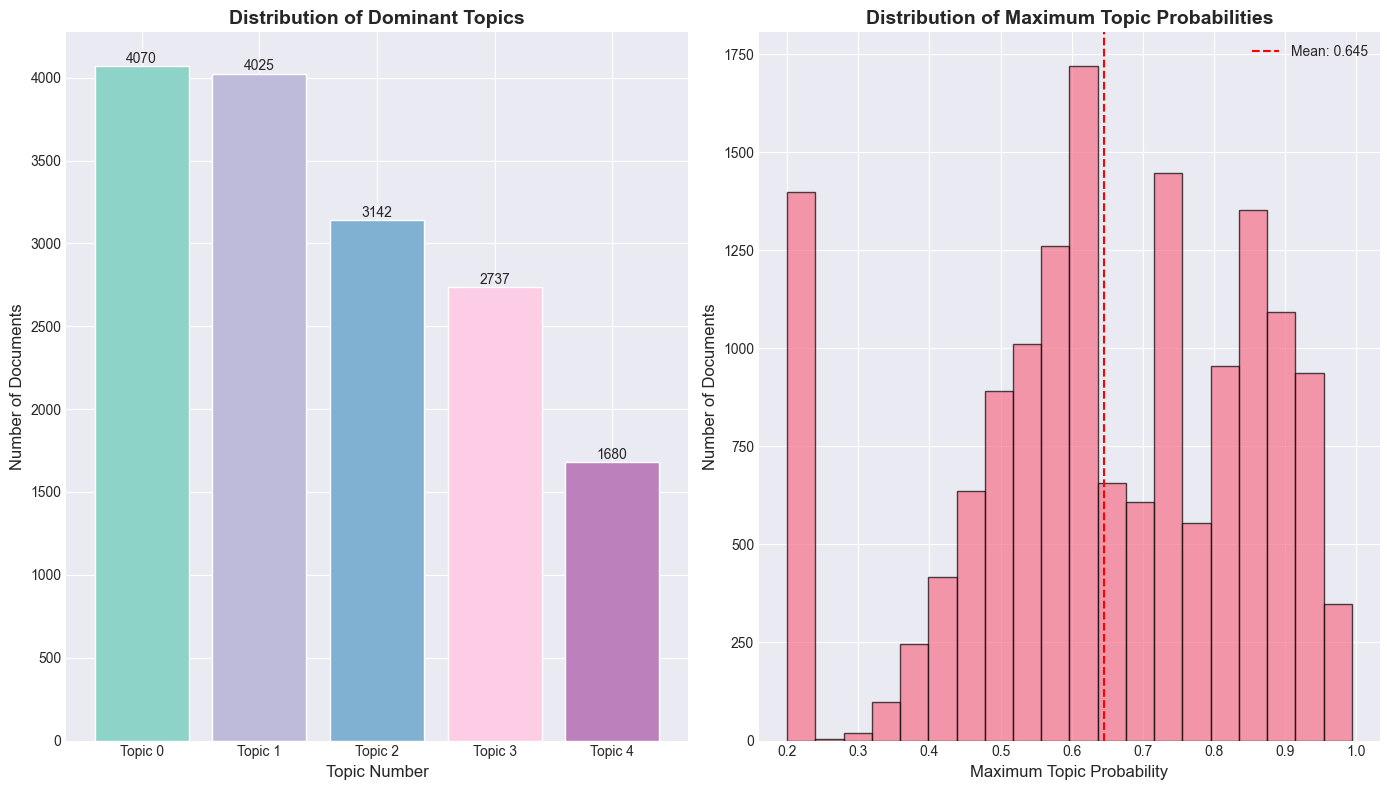


5. 文档-主题分布热力图


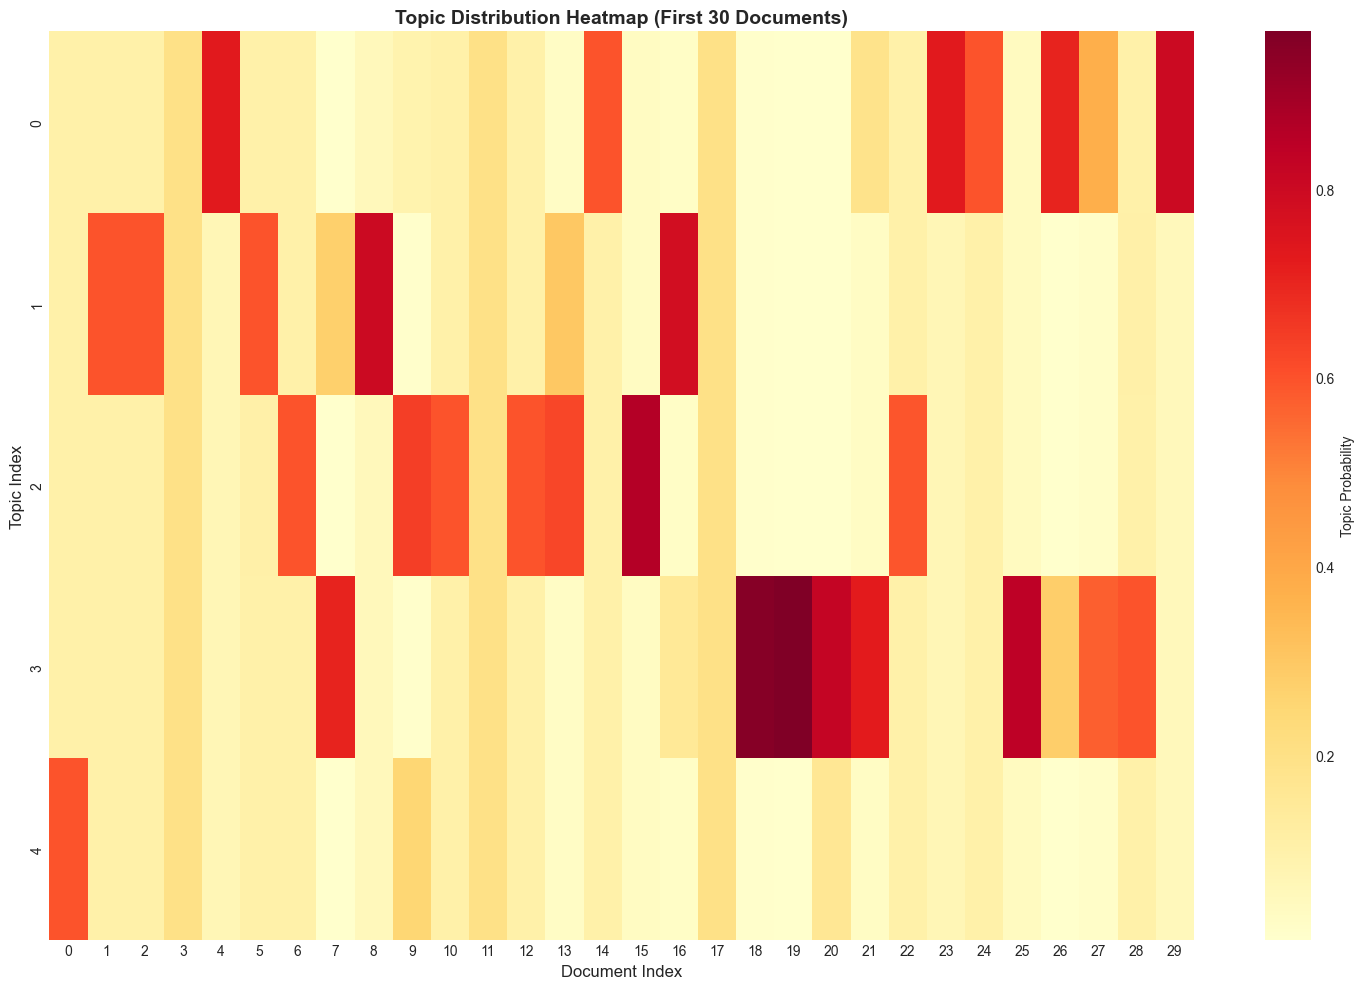


6. 主题间相关性热力图


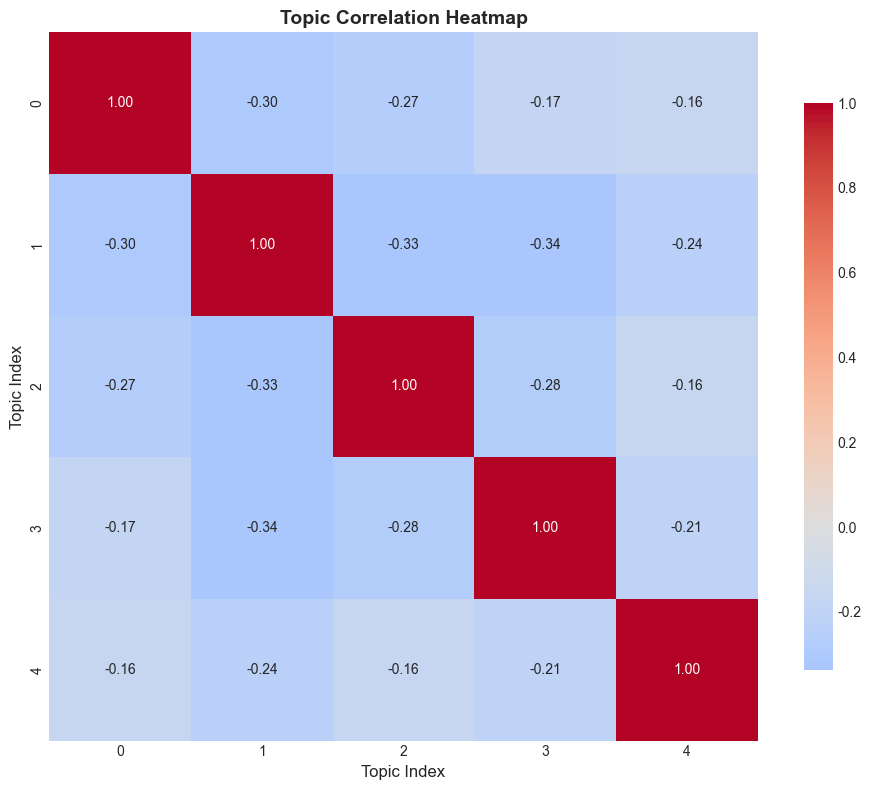


7. 主题雷达图


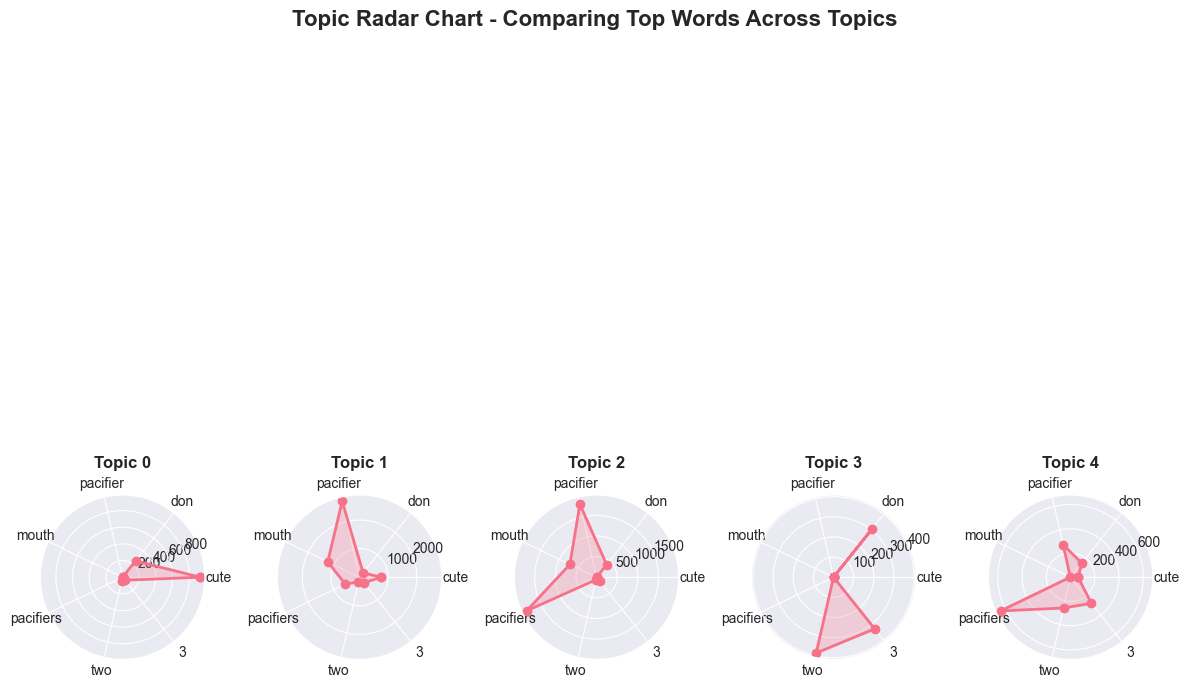


8. 交互式可视化 (pyLDAvis)
pyLDAvis未安装。如需使用，请运行: pip install pyLDAvis

主题摘要

主题 #0 (占比: 26.0%):
关键词: cute, m, super, how, mattress...
Top 10词: cute, m, super, how, mattress, don, comfortable, enough, new, sure
代表性文档 (概率: 0.980):
  this car seat is of excellent quality.  the drawbacks i can see is that the recline function does not recline far enough to compensate for the slope of the seat for the car seat to sit with the marker...

主题 #1 (占比: 25.7%):
关键词: pacifier, loves, mouth, hold, cute...
Top 10词: pacifier, loves, mouth, hold, cute, wubbanub, paci, keep, animal, night
代表性文档 (概率: 0.986):
  I purchased this product after using the Phillips Avent Soothie Pacifiers for my little daughter. They are the only pacifiers she has ever taken. It's also the kind they gave her while she was in the ...

主题 #2 (占比: 20.1%):
关键词: pacifiers, pacifier, nipple, mouth, babies...
Top 10词: pacifiers, pacifier, nipple, mouth, babies, hospital, shape, don, doesn, likes
代表性文档 (概率: 0.987):
  These are great pacif

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import rcParams
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体（如果使用中文标签）
rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
rcParams['axes.unicode_minus'] = False

# 设置绘图样式
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# 1. 每个主题的关键词可视化（水平条形图）
def plot_topic_keywords(lda_model, feature_names, n_words=15, figsize=(15, 10)):
    """
    可视化每个主题的前n个关键词
    """
    n_topics = lda_model.n_components
    fig, axes = plt.subplots(n_topics, 1, figsize=figsize, sharex=True)

    for idx, topic in enumerate(lda_model.components_):
        # 获取权重最高的前n个词
        top_indices = topic.argsort()[:-n_words-1:-1]
        top_words = [feature_names[i] for i in top_indices]
        top_weights = topic[top_indices]

        # 创建水平条形图
        ax = axes[idx] if n_topics > 1 else axes
        y_pos = np.arange(n_words)
        ax.barh(y_pos, top_weights, height=0.7)
        ax.set_yticks(y_pos)
        ax.set_yticklabels(top_words, fontsize=12)
        ax.invert_yaxis()  # 反转y轴，使权重最高的在顶部
        ax.set_title(f'Topic {idx} - Top {n_words} Keywords', fontsize=14, fontweight='bold')
        ax.set_xlabel('Word Weight', fontsize=12)

        # 在条形上添加数值标签
        for i, v in enumerate(top_weights):
            ax.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# 2. 词云可视化每个主题
def plot_topic_wordclouds(lda_model, feature_names, n_words=30, figsize=(20, 12)):
    """
    为每个主题创建词云
    """
    n_topics = lda_model.n_components
    fig, axes = plt.subplots(1, n_topics, figsize=figsize)

    if n_topics == 1:
        axes = [axes]

    for idx, topic in enumerate(lda_model.components_):
        # 获取主题的词权重
        word_weights = {}
        for i, word in enumerate(feature_names):
            word_weights[word] = topic[i]

        # 创建词云
        wordcloud = WordCloud(
            width=400,
            height=300,
            background_color='white',
            max_words=n_words,
            contour_width=3,
            contour_color='steelblue',
            colormap='tab20c'  # 使用不同的颜色映射
        ).generate_from_frequencies(word_weights)

        ax = axes[idx]
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(f'Topic {idx} Word Cloud', fontsize=14, fontweight='bold')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

# 3. 主题分布热力图
def plot_topic_heatmap(doc_topic_dist, n_docs=50, figsize=(15, 10)):
    """
    可视化文档-主题分布热力图
    """
    # 只显示前n_docs个文档
    if len(doc_topic_dist) > n_docs:
        data = doc_topic_dist[:n_docs]
    else:
        data = doc_topic_dist

    fig, ax = plt.subplots(figsize=figsize)

    # 创建热力图
    sns.heatmap(
        data.T,  # 转置，使主题在y轴，文档在x轴
        cmap='YlOrRd',
        cbar_kws={'label': 'Topic Probability'},
        ax=ax
    )

    ax.set_xlabel('Document Index', fontsize=12)
    ax.set_ylabel('Topic Index', fontsize=12)
    ax.set_title(f'Topic Distribution Heatmap (First {len(data)} Documents)',
                 fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# 4. 主题占比饼图
def plot_topic_pie_chart(dominant_topics, n_topics=5, figsize=(12, 8)):
    """
    绘制主题占比饼图
    """
    topic_counts = np.bincount(dominant_topics, minlength=n_topics)

    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(aspect="equal"))

    # 定义颜色
    colors = plt.cm.Set3(np.linspace(0, 1, n_topics))

    # 创建饼图
    wedges, texts, autotexts = ax.pie(
        topic_counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        pctdistance=0.85
    )

    # 美化百分比文本
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)
        autotext.set_fontweight('bold')

    # 添加图例
    legend_labels = [f'Topic {i} ({count} docs)' for i, count in enumerate(topic_counts)]
    ax.legend(
        wedges,
        legend_labels,
        title="Topics",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1)
    )

    ax.set_title('Topic Distribution in Documents', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

# 5. 主题词分布雷达图
def plot_topic_radar(lda_model, feature_names, n_words=10, figsize=(12, 10)):
    """
    创建主题雷达图，比较不同主题的top词
    """
    n_topics = lda_model.n_components

    # 获取所有主题的top词
    all_top_words = []
    for topic_idx, topic in enumerate(lda_model.components_):
        top_indices = topic.argsort()[:-n_words-1:-1]
        top_words = [feature_names[i] for i in top_indices]
        all_top_words.extend(top_words)

    # 找到共同的top词
    word_counts = Counter(all_top_words)
    common_words = [word for word, count in word_counts.items() if count >= 2]

    if len(common_words) < 3:  # 如果没有足够的共同词，使用所有独特的top词
        common_words = list(set(all_top_words))

    # 选择前8个词进行可视化
    common_words = common_words[:8]

    # 计算每个主题在这些词上的权重
    angles = np.linspace(0, 2 * np.pi, len(common_words), endpoint=False).tolist()
    angles += angles[:1]  # 闭合多边形

    fig, axes = plt.subplots(1, n_topics, figsize=figsize,
                            subplot_kw=dict(projection='polar'))

    if n_topics == 1:
        axes = [axes]

    for topic_idx, topic in enumerate(lda_model.components_):
        ax = axes[topic_idx]

        # 获取当前主题在共同词上的权重
        values = []
        for word in common_words:
            if word in feature_names:
                idx = np.where(feature_names == word)[0][0]
                values.append(topic[idx])
            else:
                values.append(0)

        values += values[:1]  # 闭合多边形

        # 绘制雷达图
        ax.plot(angles, values, 'o-', linewidth=2)
        ax.fill(angles, values, alpha=0.25)

        # 设置刻度标签
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(common_words, fontsize=10)
        ax.set_title(f'Topic {topic_idx}', fontsize=12, fontweight='bold')

    plt.suptitle('Topic Radar Chart - Comparing Top Words Across Topics',
                fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

# 6. 文档主题分布直方图
def plot_document_topic_histogram(doc_topic_dist, n_topics=5, figsize=(14, 8)):
    """
    绘制文档主题分布直方图
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # 获取每个文档的主要主题
    dominant_topics = np.argmax(doc_topic_dist, axis=1)

    # 1. 主要主题分布
    ax1 = axes[0]
    topic_counts = np.bincount(dominant_topics, minlength=n_topics)

    bars = ax1.bar(range(n_topics), topic_counts,
                   color=plt.cm.Set3(np.arange(n_topics) / n_topics))
    ax1.set_xlabel('Topic Number', fontsize=12)
    ax1.set_ylabel('Number of Documents', fontsize=12)
    ax1.set_title('Distribution of Dominant Topics', fontsize=14, fontweight='bold')
    ax1.set_xticks(range(n_topics))
    ax1.set_xticklabels([f'Topic {i}' for i in range(n_topics)])

    # 在柱子上添加数量标签
    for bar, count in zip(bars, topic_counts):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{count}', ha='center', va='bottom', fontsize=10)

    # 2. 主题概率分布
    ax2 = axes[1]
    max_probabilities = np.max(doc_topic_dist, axis=1)

    ax2.hist(max_probabilities, bins=20, edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Maximum Topic Probability', fontsize=12)
    ax2.set_ylabel('Number of Documents', fontsize=12)
    ax2.set_title('Distribution of Maximum Topic Probabilities',
                   fontsize=14, fontweight='bold')
    ax2.axvline(x=np.mean(max_probabilities), color='red', linestyle='--',
               label=f'Mean: {np.mean(max_probabilities):.3f}')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# 7. 主题相关性热力图
def plot_topic_correlation_heatmap(lda_model, doc_topic_dist, figsize=(10, 8)):
    """
    绘制主题间相关性热力图
    """
    # 计算主题间的相关性矩阵
    topic_corr = np.corrcoef(doc_topic_dist.T)

    fig, ax = plt.subplots(figsize=figsize)

    # 创建热力图
    sns.heatmap(
        topic_corr,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        center=0,
        square=True,
        cbar_kws={'shrink': 0.8},
        ax=ax
    )

    ax.set_xlabel('Topic Index', fontsize=12)
    ax.set_ylabel('Topic Index', fontsize=12)
    ax.set_title('Topic Correlation Heatmap', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

# 8. 交互式可视化函数
def visualize_lda_results(lda_model, feature_names, doc_topic_dist,
                         dominant_topics, n_topics=5):
    """
    整合所有可视化
    """
    print("=" * 60)
    print("LDA主题建模可视化结果")
    print("=" * 60)

    # 1. 关键词条形图
    print("\n1. 每个主题的关键词分布")
    plot_topic_keywords(lda_model, feature_names, n_words=12)

    # 2. 词云
    print("\n2. 主题词云")
    plot_topic_wordclouds(lda_model, feature_names, n_words=30)

    # 3. 主题占比饼图
    print("\n3. 文档主题分布饼图")
    plot_topic_pie_chart(dominant_topics, n_topics)

    # 4. 文档主题分布直方图
    print("\n4. 文档主题分布直方图")
    plot_document_topic_histogram(doc_topic_dist, n_topics)

    # 5. 主题热力图
    print("\n5. 文档-主题分布热力图")
    plot_topic_heatmap(doc_topic_dist, n_docs=30)

    # 6. 主题相关性热力图
    print("\n6. 主题间相关性热力图")
    plot_topic_correlation_heatmap(lda_model, doc_topic_dist)

    # 7. 雷达图（如果有足够的共同词）
    print("\n7. 主题雷达图")
    try:
        plot_topic_radar(lda_model, feature_names, n_words=8)
    except:
        print("雷达图需要至少3个共同词，跳过此图表")

# 9. 使用pyLDAvis进行交互式可视化（如果安装了）
def visualize_with_pyLDAvis(X, lda_model, vectorizer):
    """
    使用pyLDAvis创建交互式可视化
    需要先安装: pip install pyLDAvis
    """
    try:
        import pyLDAvis
        import pyLDAvis.sklearn

        # 准备可视化数据
        panel = pyLDAvis.sklearn.prepare(
            lda_model,
            X,
            vectorizer,
            mds='tsne',
            sort_topics=False
        )

        # 显示可视化
        return panel
    except ImportError:
        print("pyLDAvis未安装。如需使用，请运行: pip install pyLDAvis")
        return None
    except Exception as e:
        print(f"pyLDAvis可视化时出错: {e}")
        return None

# 调用可视化函数
print("开始可视化LDA主题建模结果...")
print(f"主题数量: {n_topics}")
print(f"文档数量: {X.shape[0]}")
print(f"词汇表大小: {X.shape[1]}")

# 计算每个文档的主要主题
dominant_topics = np.argmax(doc_topic_dist, axis=1)

# 执行所有可视化
visualize_lda_results(lda, feature_names, doc_topic_dist, dominant_topics, n_topics)

# 可选：使用pyLDAvis进行高级交互式可视化
print("\n8. 交互式可视化 (pyLDAvis)")
panel = visualize_with_pyLDAvis(X, lda, vectorizer)
if panel is not None:
    # 保存为HTML文件
    pyLDAvis.save_html(panel, 'lda_visualization.html')
    print("交互式可视化已保存为 'lda_visualization.html'")
    # 在Jupyter Notebook中显示
    # pyLDAvis.display(panel)

# 额外：主题标签生成（基于top words）
print("\n" + "=" * 60)
print("主题摘要")
print("=" * 60)

for topic_idx, topic in enumerate(lda.components_):
    # 获取权重最高的前10个词
    top_words_indices = topic.argsort()[:-10-1:-1]
    top_words = [feature_names[i] for i in top_words_indices]

    # 计算主题在文档中的比例
    topic_proportion = (dominant_topics == topic_idx).sum() / len(dominant_topics)

    print(f"\n主题 #{topic_idx} (占比: {topic_proportion:.1%}):")
    print(f"关键词: {', '.join(top_words[:5])}...")
    print(f"Top 10词: {', '.join(top_words)}")

    # 显示一些代表性文档
    topic_docs = np.where(dominant_topics == topic_idx)[0]
    if len(topic_docs) > 0:
        # 找到该主题下概率最高的文档
        topic_probs = doc_topic_dist[topic_docs, topic_idx]
        most_representative_idx = topic_docs[np.argmax(topic_probs)]

        print(f"代表性文档 (概率: {doc_topic_dist[most_representative_idx, topic_idx]:.3f}):")
        print(f"  {cc2.iloc[most_representative_idx][:200]}..." if len(cc2.iloc[most_representative_idx]) > 200
              else f"  {cc2.iloc[most_representative_idx]}")